DESC version 0.12.1+117.gdbe3914d2.dirty,using JAX backend, jax version=0.4.30, jaxlib version=0.4.30, dtype=float64
Using device: CPU, with 26.32 GB available memory
R_lmn = 66
self.R_lmn= 66
R_lmn = 3
self.R_lmn= 3
(2106, 3) 10 10 0
Time to evaluate Fourier basis =  0.15494298934936523
Time to evaluate FE basis =  1.0671391487121582
468
Time to evaluate FE2 =  0.030919790267944336
Time to construct A matrix =  7.700920104980469e-05
Time to construct vector b =  0.035841941833496094
Time to solve Ax = b,  0.0011019706726074219
R_lmn = 972
self.R_lmn= 3


(<Figure size 288.216x360.27 with 1 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

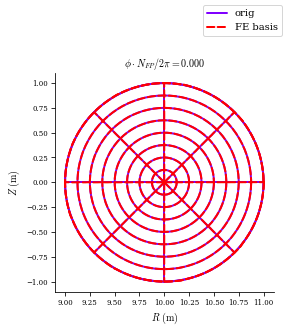

In [1]:
from desc.plotting import *
from desc.equilibrium import Equilibrium
import desc.examples
eq1 = Equilibrium(L=10,M=10)
eq2 = Equilibrium(basis="FE",L_grid=10,M_grid=10,K_FE=2)
plot_comparison([eq1,eq2],labels=["orig","FE basis"],ls=["-","--"],lw=[2,2])

R_lmn = 252
self.R_lmn= 252
R_lmn = 27
self.R_lmn= 27
(10800, 3) 6 6 4
Time to evaluate Fourier basis =  0.22351694107055664
Time to evaluate FE basis =  10.43005919456482
2400
Time to evaluate FE2 =  0.04100513458251953
Time to construct A matrix =  7.295608520507812e-05
Time to construct vector b =  0.09032487869262695
Time to solve Ax = b,  0.006191730499267578
R_lmn = 4500
self.R_lmn= 27


(<Figure size 864.648x720.54 with 6 Axes>,
 array([<Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.000$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.167$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.333$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.500$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.667$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>,
        <Axes: title={'center': '$\\phi \\cdot N_{FP}/2\\pi = 0.833$'}, xlabel='$R ~(\\mathrm{m})$', ylabel='$Z ~(\\mathrm{m})$'>],
       dtype=object))

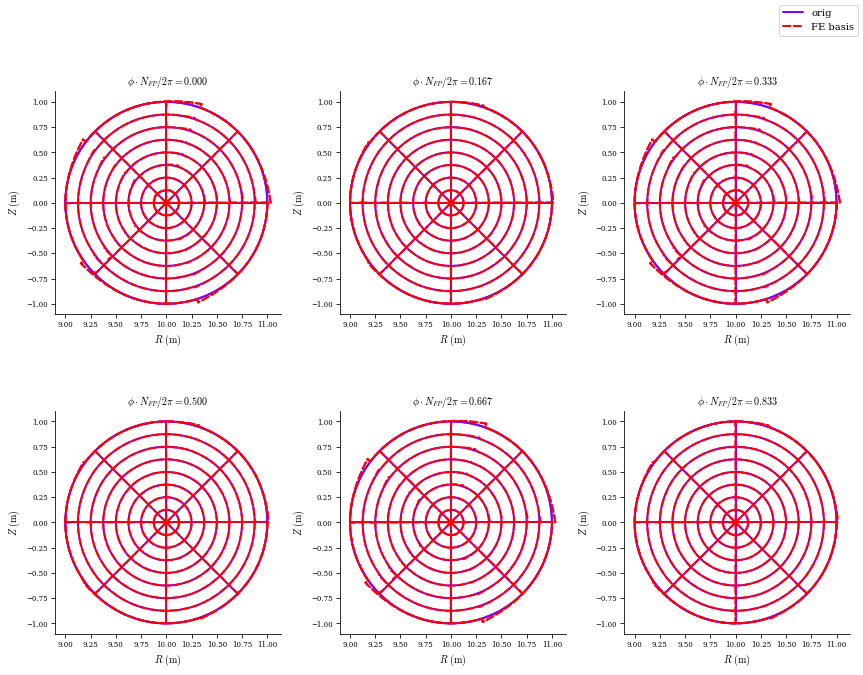

In [2]:
eq1 = Equilibrium(L=6,M=6, N=4)
eq2 = Equilibrium(basis="FE",L_grid=6,M_grid=6,N_grid=4,K_FE=2,N=4)
plot_comparison([eq1,eq2],labels=["orig","FE basis"],ls=["-","--"],lw=[2,2])